# Black-Friday-Sales-Prediction


## Data


## Variable                                Definition 



1)User_ID                                User ID



2)Product_ID                             Product ID



3)Gender	                             Sex of User



4)Age	                                 Age in bins



5)Occupation	                         Occupation (Masked)



6)City_Category	                         Category of the City (A,B,C)



7)Stay_In_Current_City_Years	         Number of years stay in current city



8)Marital_Status	                     Marital Status



9)Product_Category_1	                 Product Category (Masked)



10)Product_Category_2	                 Product may belongs to other category also (Masked)



11)Product_Category_3	                 Product may belongs to other category also (Masked)



12)Purchase	                             Purchase Amount (Target Variable)





In [1]:
# importing required libraries:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
#loading Dataset:
df_train = pd.read_csv('Desktop/PPT/DataSets/BlackFridaySales/train.csv')

In [4]:
df_train

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [5]:
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df_train.shape

(550068, 12)

In [7]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [9]:
df_train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [10]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Product_Category_1'}>,
        <AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Product_Category_3'}>],
       [<AxesSubplot:title={'center':'Purchase'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

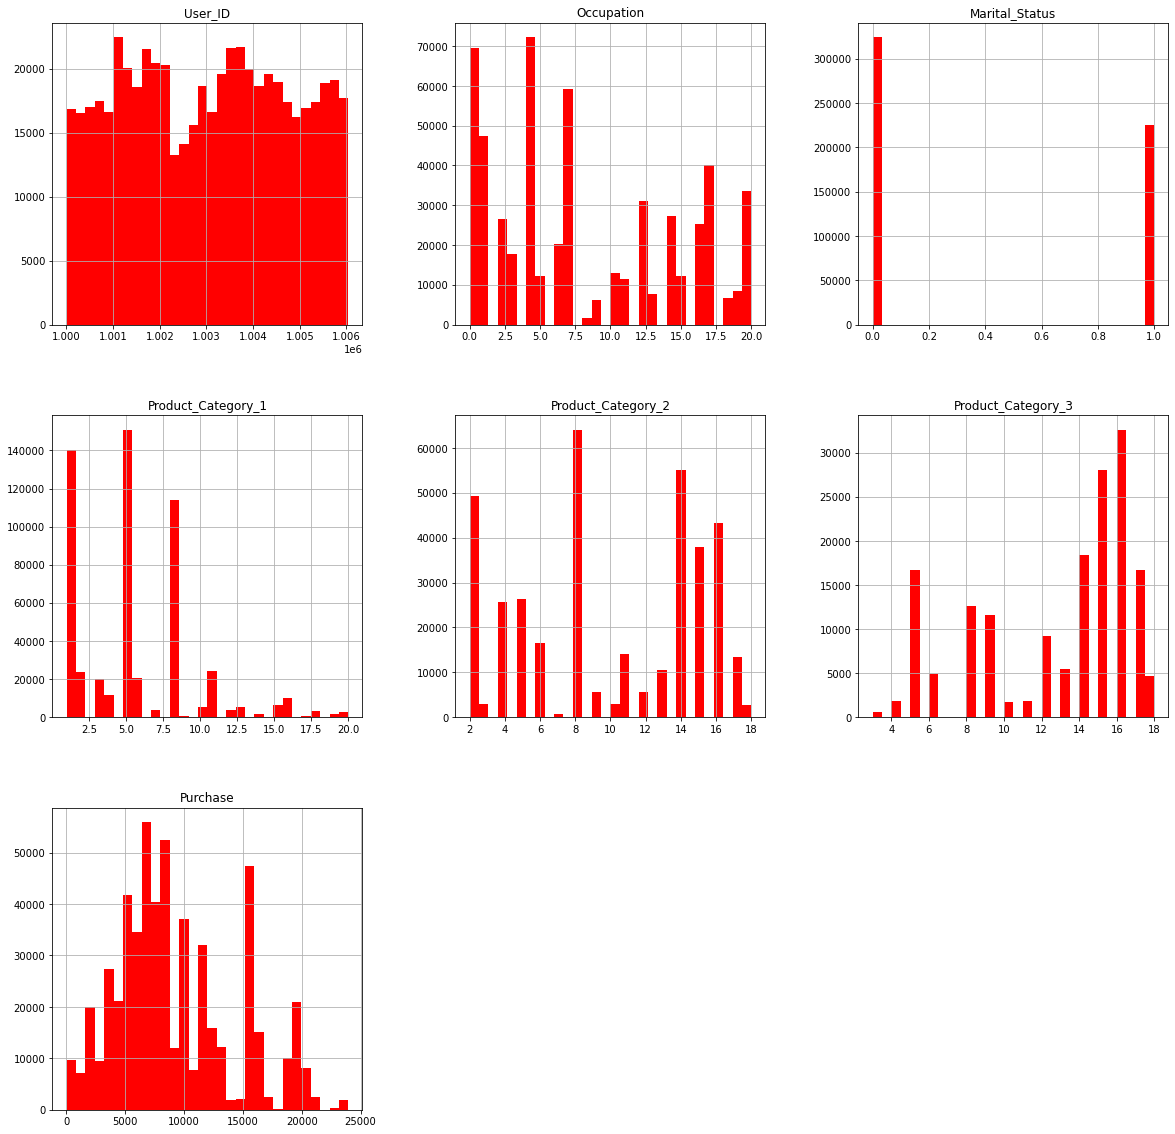

In [11]:
# Histogram plot of different train columns:
df_train.hist(bins=30,figsize=(20,20),color = 'r')

In [12]:
#print unique columns:
print(df_train['Gender'].unique())
print(df_train['City_Category'].unique())
print(df_train['Occupation'].unique())
print(df_train['Marital_Status'].unique())

['F' 'M']
['A' 'C' 'B']
[10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
[0 1]


In [13]:
#print nunique columns:
print(df_train['Gender'].nunique())
print(df_train['City_Category'].nunique())
print(df_train['Occupation'].nunique())
print(df_train['Marital_Status'].nunique())

2
3
21
2


In [14]:
#loading test dataset: 
df_test = pd.read_csv('Desktop/PPT/DataSets/BlackFridaySales/test.csv')

In [15]:
df_test

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [16]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [17]:
df_test.shape

(233599, 11)

In [18]:
df_test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [19]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [20]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [21]:
df_test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>],
       [<AxesSubplot:title={'center':'Marital_Status'}>,
        <AxesSubplot:title={'center':'Product_Category_1'}>],
       [<AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Product_Category_3'}>]],
      dtype=object)

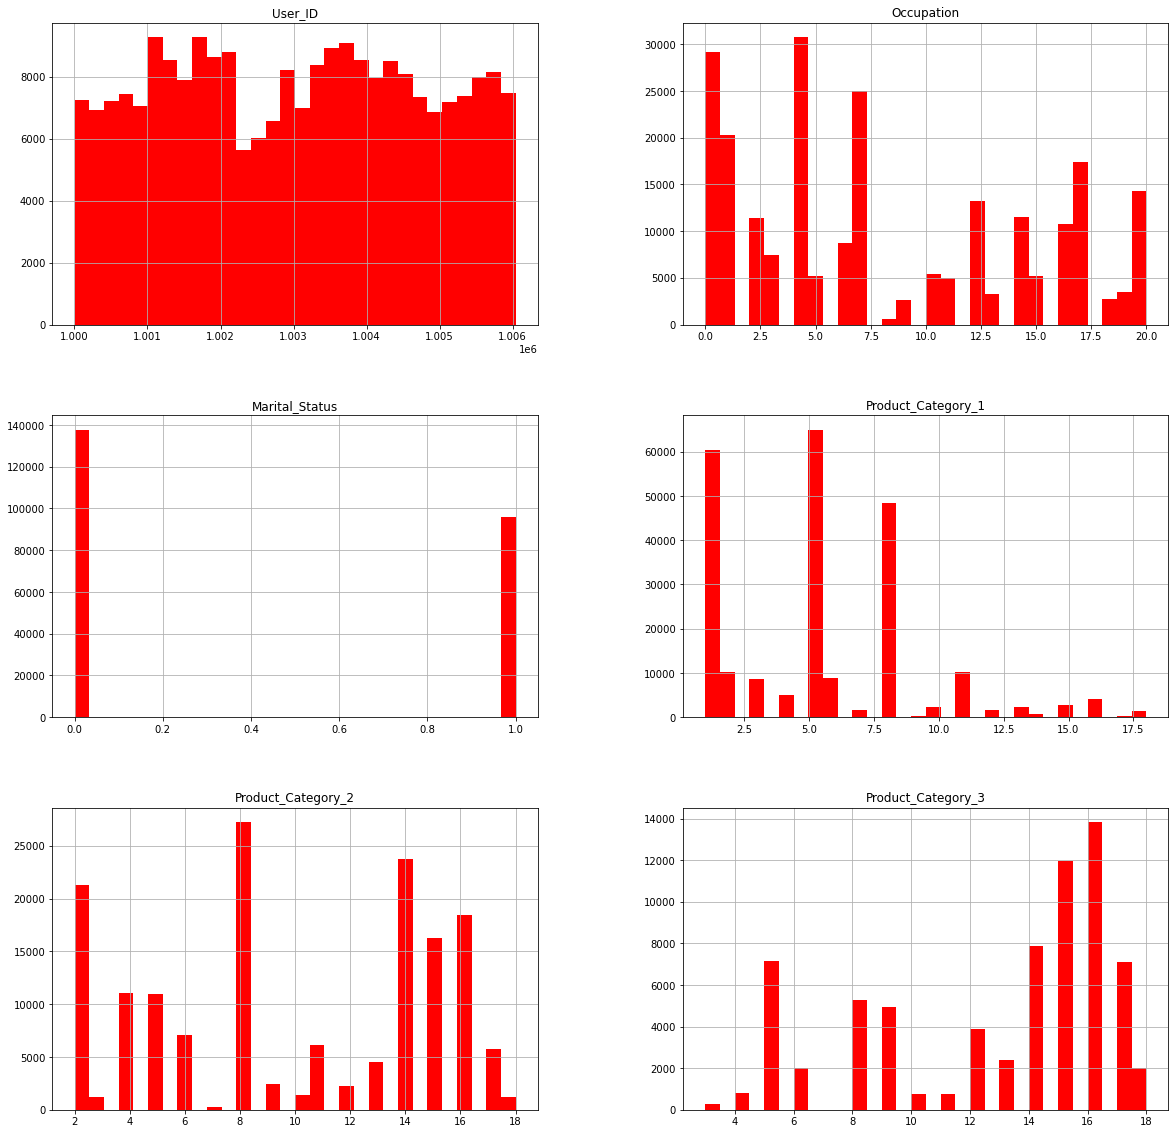

In [22]:
# Histogram plot of different  test columns:
df_test.hist(bins=30,figsize=(20,20),color = 'r')

In [23]:
#print unique columns:
print(df_test['Gender'].unique())
print(df_test['City_Category'].unique())
print(df_test['Occupation'].unique())
print(df_test['Marital_Status'].unique())

['M' 'F']
['B' 'C' 'A']
[ 7 17  1 15  3  0  8 16  4 12 13 18 11  9  2 20 14 10  6 19  5]
[1 0]


In [24]:
#print nunique columns:
print(df_test['Gender'].nunique())
print(df_test['City_Category'].nunique())
print(df_test['Occupation'].nunique())
print(df_test['Marital_Status'].nunique())

2
3
21
2


In [25]:
df = pd.concat([df_train,df_test])

In [26]:
df.shape

(783667, 12)

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [28]:
# removing '+' symbol from the column:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].apply(lambda x: x.replace('+', '')
                                if isinstance(x, str) else x).astype(int)
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('object')
df.Stay_In_Current_City_Years.value_counts()

1    276425
2    145427
3    135428
4    120671
0    105716
Name: Stay_In_Current_City_Years, dtype: int64

array([[<AxesSubplot:title={'center':'User_ID'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Marital_Status'}>],
       [<AxesSubplot:title={'center':'Product_Category_1'}>,
        <AxesSubplot:title={'center':'Product_Category_2'}>,
        <AxesSubplot:title={'center':'Product_Category_3'}>],
       [<AxesSubplot:title={'center':'Purchase'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

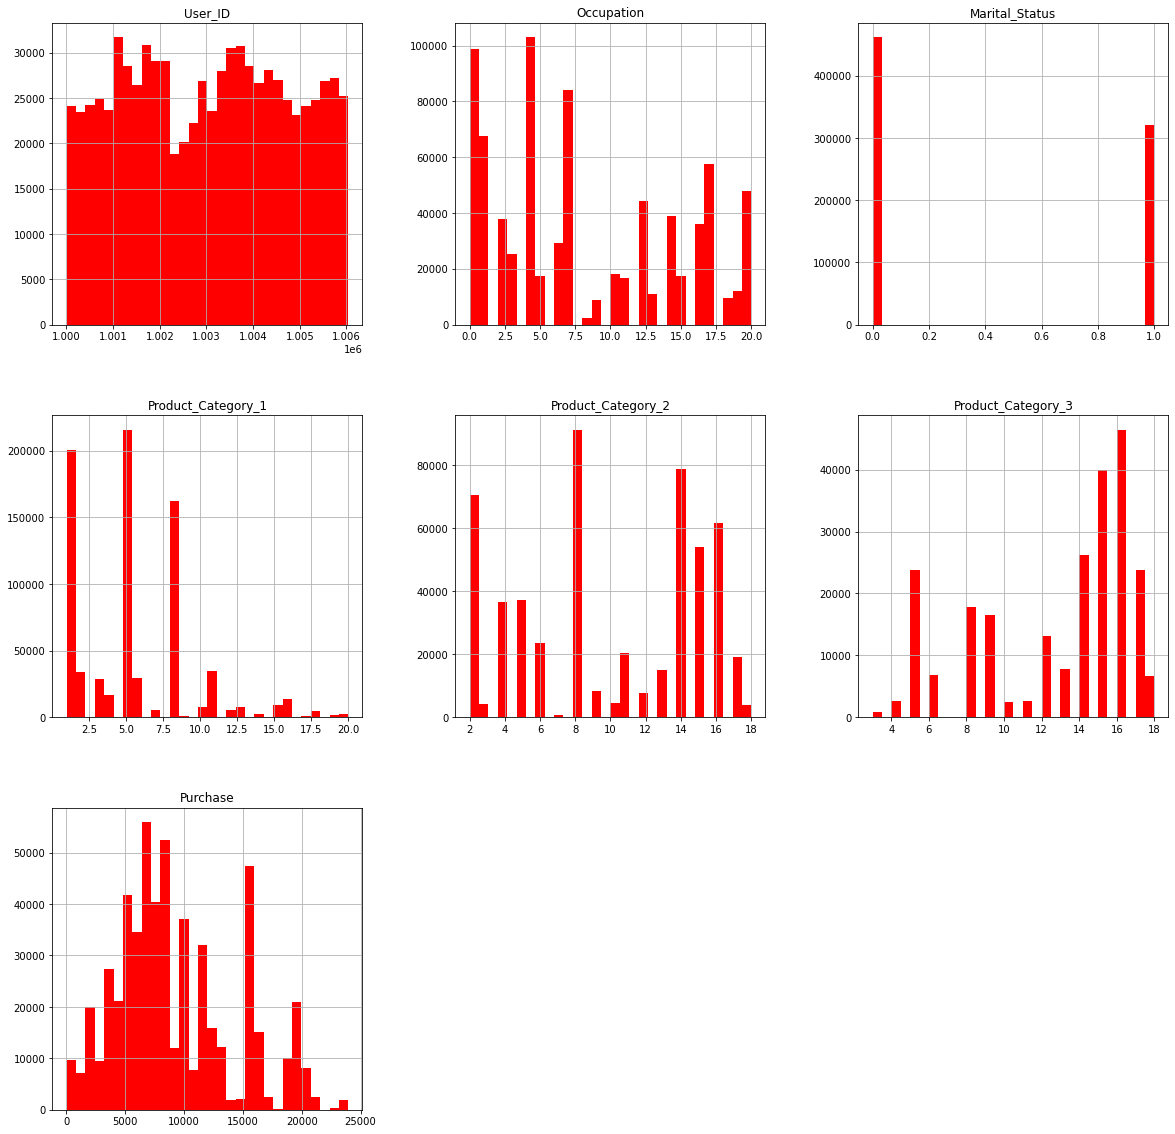

In [29]:
df.hist(bins=30,figsize=(20,20),color = 'r')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [31]:
# fitting LabelEncoder for particular columns:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_Age = LabelEncoder()
le_Gender = LabelEncoder()
le_City_Category = LabelEncoder()
le_Stay_In_Current_City_Years = LabelEncoder()

In [32]:
df['Gender'] = le.fit_transform(df['Gender'].values)
df['Age'] = le.fit_transform(df['Age'].values)
df['City_Category'] = le.fit_transform(df['City_Category'].values)
df['Stay_In_Current_City_Years'] = le.fit_transform(df['Stay_In_Current_City_Years'].values)

In [33]:
# replace Nan values with '0'
df['Product_Category_2'] = df['Product_Category_2'].replace(np.NaN, 0)
df['Product_Category_3'] = df['Product_Category_3'].replace(np.NaN, 0)
df['Purchase'] = df['Purchase'].replace(np.nan, 0)
df['Purchase'] = df['Purchase'].replace(np.inf, 0)

In [34]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370.0
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422.0
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057.0
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969.0


In [35]:
df['Purchase'].unique()

array([ 8370., 15200.,  1422., ...,   123.,   613.,     0.])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  int32  
 3   Age                         783667 non-null  int32  
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  int32  
 6   Stay_In_Current_City_Years  783667 non-null  int32  
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          783667 non-null  float64
 10  Product_Category_3          783667 non-null  float64
 11  Purchase                    783667 non-null  float64
dtypes: float64(3), int32(4), int64(4), object(1)
memory usage: 65.8+ MB


In [37]:
# changing datatype from float to integer
df['Product_Category_1']  = df['Product_Category_1'].astype('int')
df['Product_Category_2']  = df['Product_Category_2'].astype('int')
df['Product_Category_3']  = df['Product_Category_3'].astype('int')
df['Purchase']  = df['Purchase'].astype('int')

In [38]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0,0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6,14,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0,0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14,0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0,0,7969


In [39]:
#applying lambda function to remove "P" from ProductID columns:
df['Product_ID'] = df['Product_ID'].apply(lambda x: x.replace('P', '')
                                if isinstance(x, str) else x).astype(int)

df['Product_ID'] = df['Product_ID'].astype('int')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     783667 non-null  int64
 1   Product_ID                  783667 non-null  int32
 2   Gender                      783667 non-null  int32
 3   Age                         783667 non-null  int32
 4   Occupation                  783667 non-null  int64
 5   City_Category               783667 non-null  int32
 6   Stay_In_Current_City_Years  783667 non-null  int32
 7   Marital_Status              783667 non-null  int64
 8   Product_Category_1          783667 non-null  int32
 9   Product_Category_2          783667 non-null  int32
 10  Product_Category_3          783667 non-null  int32
 11  Purchase                    783667 non-null  int32
dtypes: int32(9), int64(3)
memory usage: 50.8 MB


<AxesSubplot:>

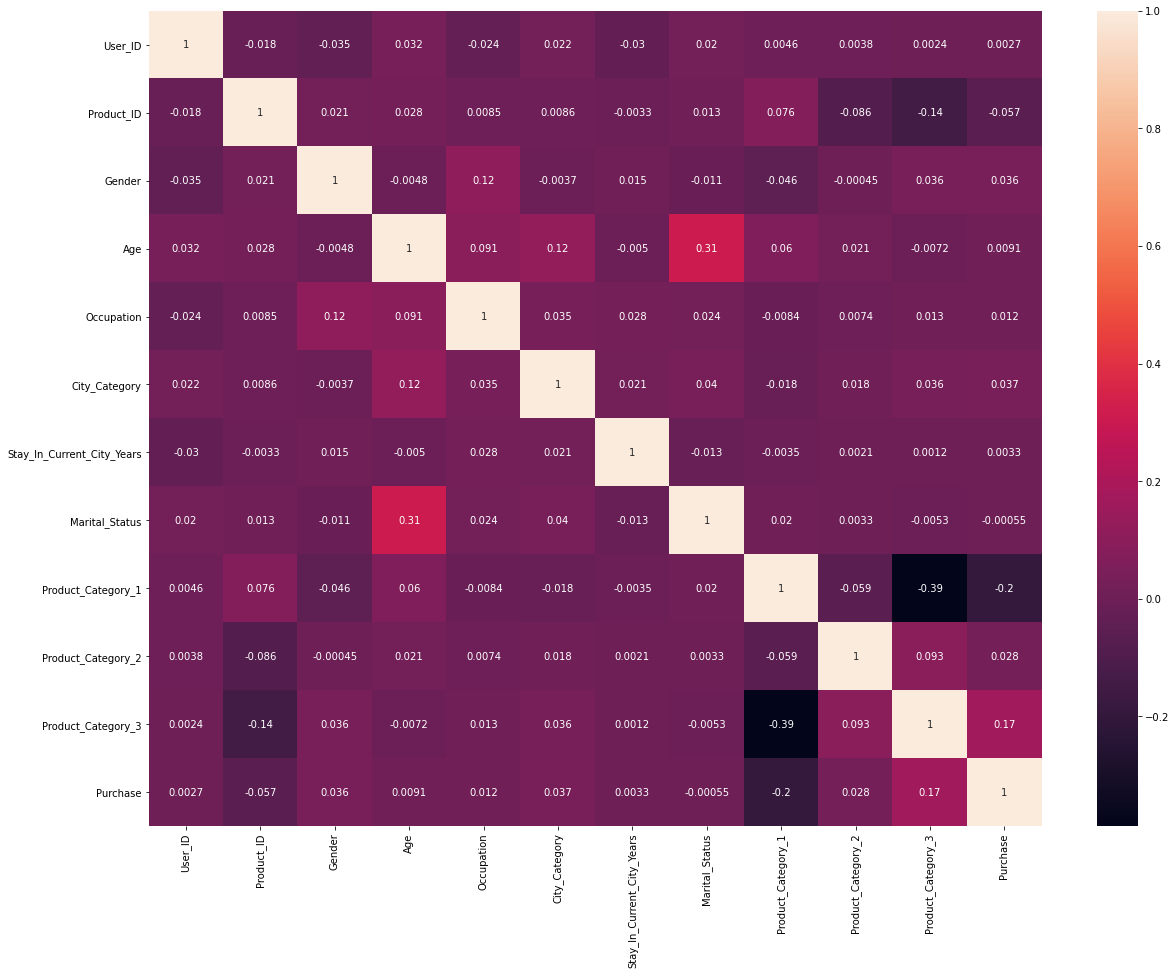

In [41]:
#correlation:
corr= df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)

<AxesSubplot:xlabel='Age', ylabel='count'>

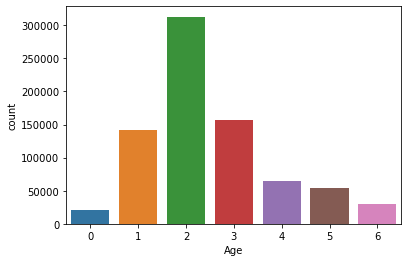

In [42]:
#countplot for Age
sns.countplot(df['Age'])

<AxesSubplot:xlabel='Gender', ylabel='count'>

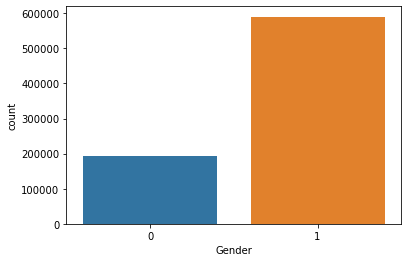

In [43]:
#countplot for Gender
sns.countplot(df['Gender'])

<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

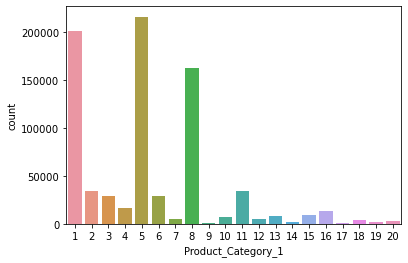

In [44]:
#countplot for Product_category_1
sns.countplot(df['Product_Category_1'])

<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

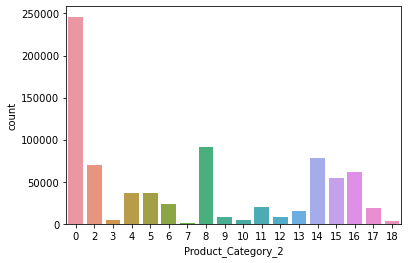

In [45]:
##countplot for Product_category_2
sns.countplot(df['Product_Category_2'])

<AxesSubplot:xlabel='Product_Category_3', ylabel='count'>

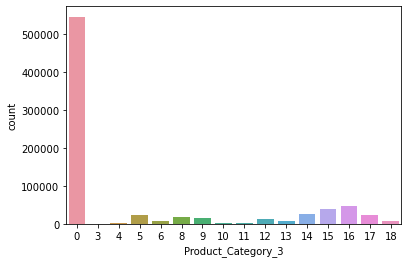

In [46]:
##countplot for Product_category_3
sns.countplot(df['Product_Category_3'])

<AxesSubplot:xlabel='City_Category', ylabel='count'>

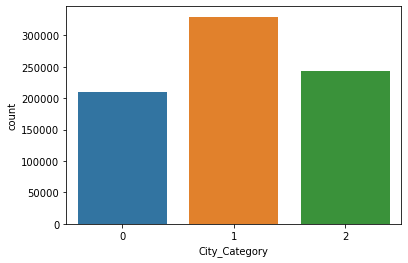

In [47]:
#countplot for City_Category:
sns.countplot(df['City_Category'])

<AxesSubplot:xlabel='Occupation', ylabel='count'>

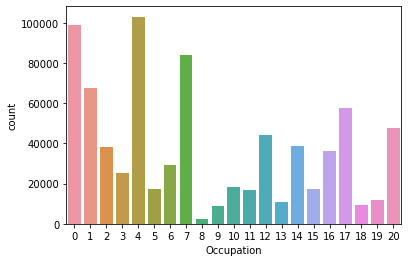

In [48]:
#countplot for Occupation:
sns.countplot(df['Occupation'])

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

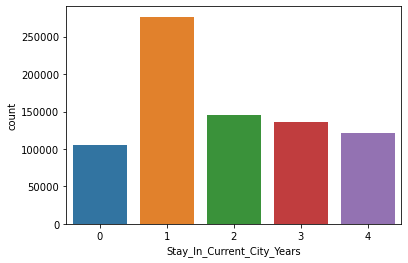

In [49]:
##countplot for Stay_In_Current_City_Years:
sns.countplot(df['Stay_In_Current_City_Years'])

In [50]:
#splitting X and Y columns based on dependent and independent columns:
X = df.drop(columns=['User_ID','Product_ID','Purchase']).values
y = df['Purchase'].values

In [51]:
X

array([[ 0,  0, 10, ...,  3,  0,  0],
       [ 0,  0, 10, ...,  1,  6, 14],
       [ 0,  0, 10, ..., 12,  0,  0],
       ...,
       [ 0,  2, 15, ...,  1,  5, 12],
       [ 0,  4,  1, ..., 10, 16,  0],
       [ 0,  4,  0, ...,  4,  5,  0]], dtype=int64)

In [52]:
y

array([ 8370, 15200,  1422, ...,     0,     0,     0])

In [53]:
# split using train_test_split from model_selection
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [54]:
X_train

array([[ 0,  1,  4, ...,  8,  0,  0],
       [ 1,  1,  4, ...,  1,  5,  9],
       [ 1,  0, 10, ...,  1,  2,  0],
       ...,
       [ 0,  4, 15, ...,  5,  0,  0],
       [ 1,  1,  4, ...,  2,  4,  0],
       [ 1,  6, 17, ...,  8, 17,  0]], dtype=int64)

In [55]:
y_train

array([    0,  8293, 11695, ...,  6991, 13251,  9905])

In [56]:
# import LinearRegression from linear_model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [57]:
# Create and fit the model
model.fit(X_train,y_train)

LinearRegression()

In [58]:
#bias(b)
model.intercept_

6623.401775279578

In [59]:
#slope/weight (w)
model.coef_

array([ 338.50239203,   72.78402074,    2.81813331,  221.70524876,
          9.98796306,  -41.28649174, -234.08321439,    6.83511439,
        103.655219  ])

In [60]:
#Predict
y_pred = model.predict(X_test)

In [61]:
y_pred

array([7299.17119202, 4944.71035382, 6030.20454395, ..., 6530.53554669,
       4085.62673475, 3168.36769201])

In [62]:
y_test

array([15192,  8121,     0, ...,  6877,  1737,    48])

In [63]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [64]:
#r2_score()
score = r2_score(y_test,y_pred)

In [65]:
score

0.05065128501019445

In [66]:
#MSE Error:
mean_squared_error(y_test,y_pred)

33944162.147191234

In [67]:
#MAE Error:
mean_absolute_error(y_test,y_pred)

4757.3258337128045

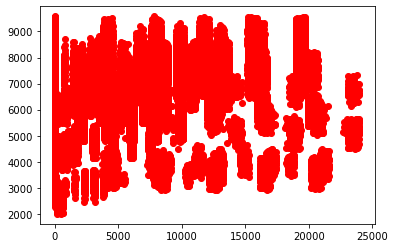

In [68]:
#scatter plot between y_test&y_pred
plt.scatter(y_test,y_pred,color ='red')
plt.show()